<!-- mission_number=3 file_list=['admissions.csv'] mode="multiscreen" -->

# Introduction
## Using logistic regression to predict admissions
### TJ Vandal


<!-- type="code" -->

# Introduction to the Data

Logistic regression is used in a variety of field and applications for binary classification. To grasp the concepts of logistic regression we will be analyzing a synthetic dataset created by a group at UCLA to simulate admissions criteria for graduate school of 400 applicants. Our goal is to predict whether a student will be admitted given GPA, GRE scores, and class school rank. 

gre - Graduate Record Exam, a generalized test for prospective graduate students, continuous <br>
gpa - Cumulative grade point average, continuous <br>
rank - Prestige of undergraduate school, discrete <br>
admit - Binary variable, 0 or 1, where 1 means the applicant was admitted to the program

This lesson and data are taken from http://blog.yhathq.com/posts/logistic-regression-and-python.html. 

## Instructions

The first part of any data analysis is to gain a basic insights about the data. Visualizations and summarizations of the data are effective for this task. More often than not these basic insights provide valuable information pertaining to the direction of the analysis. By plotting histograms of each variable we get an understanding of the distributions. Read 'admissions.csv' into variable 'admissions', plot, and describe it using pandas. 

## Hint

Modify the code above to work with 'admissions.csv'. 

               749
count    72.000000
mean    791.819444
std     428.460307
min     130.000000
25%     497.500000
50%     652.500000
75%    1032.500000
max    2122.000000


['admissions', 'description', 'dq.plot(1)']

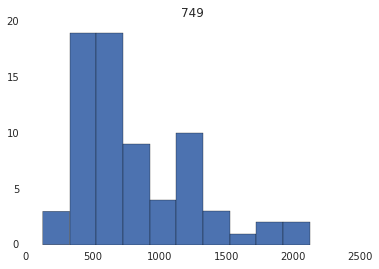

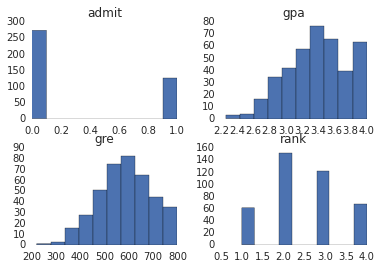

In [11]:
## Initial

# Load relevent libraries
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import seaborn

## Display
# load crime data from a previous lesson
crime_rates = pandas.read_csv("crime_rates.csv")

# describe dataset using pandas describe function
print(crime_rates.describe())

# create a simple histogram of our variables
crime_rates.hist()

## Answer
admissions = pandas.read_csv("admissions.csv")
description = admissions.describe()
admissions.hist()

## Check vars

['admissions', 'description', 'dq.plot(1)']

<!-- type="code" -->

# Logistic Regression

Logistic regression is a popular method to predict binary outputs by constraining the model's output between 0 and 1. This output can be viewed as the probability of an event given a set of inputs. The single variable logistic regression model is defined as,

<center>$\pi_i=\dfrac{e^{\beta_0+\beta_1x_i}}{1+e^{\beta_0+\beta_1x_i}}$ where $y_i\stackrel{ind}\sim Bernoulli(\pi_i)$

A random variable that follows the Bernoulli distribution takes value 1 with success probability p and value 0 with failure probability q=1-p. 

Similar to a linear regression model, we want to compute the optimal values for $\beta_0$ and $\beta_1$ to minimize the the error between the output and the true value. Maximim likelihood method and gradient decent are methods used to approximate these coefficients. We will be applying the maximum likelihood estimation method in this lesson.

To get a better understanding of the logistic function, $\sigma(t)=\dfrac{e^t}{1+e^t}$, we will visualize this by varying $t$. We see a function which is "s-shaped" and constrained between 0 and 1. These attributes make the logistic function able to predict a binary output. 

## Instructions

Lets see what happens when 'logistic' is evaluated at extreme values. Set the value evaluated by 'logistic' at -10 and 10 to a and b. 

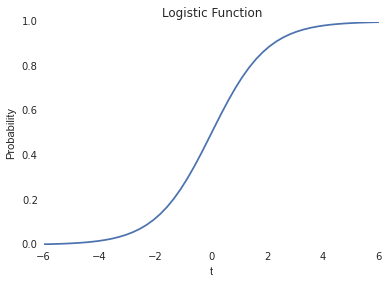

['a', 'b']

In [13]:
## Initial
import numpy
import seaborn
## Display

# Logistic Function
def logistic(x):
    return numpy.exp(x) / (1 + numpy.exp(x)) 

# Create an array with 50 values between -6 and 6 as t
t = numpy.linspace(-6,6,50, dtype=float)

# Get logistic fits
ylogistic = logistic(t)

# plot the logistic function
plt.plot(t, ylogistic, label="logistic")
plt.ylabel("Probability")
plt.xlabel("t")
plt.title("Logistic Function")
plt.show()

## Answer
a = logistic(-10)
b = logistic(10)

## Check Vars
['a', 'b']


<!-- type="code" -->

# Dummy Variables

Categorical variables must be transformed appropriately to dummy variables. In our example the class rank is considered a categorical variable, these categories are 1, 2, 3, and 4. 

Pandas has a great function, get_dummies, which easily transforms these categories into binary features. With 4 categories there are 3 degrees of freedom so we choose the last 3 columns of dummy features to add to our dataset. 


In [ ]:
## Initial
admissions = pandas.read_csv("admissions.csv")

## Display
# create dataframe of dummy variables
dummies = pandas.get_dummies(admissions['rank'], prefix='rank')

## join last 3 columns to admissions dataframe and remove rank column
data = admissions.join(dummies.ix[:, 1:])
del data['rank']
print(data.head())

<!-- type="code" -->

# Model Data

Lets try to predict admission using the logistic regression model. The first 300 observations will be for training the model and the rest will be used for testing. 

The statsmodels library is used to fit our model with maximum likelihood estimation. Maximum likelihood will be covered in future lessons. A summarization of the model can be shown by using the summary function on the model fit. Here we are able to look at the residuals, p-values, AIC, BIC, and other statistical information for further interpretation.

## Instructions

Now that we have fit the model we can predict the probability of admission. Set the variable 'fitted_test' equal to the probability prediction from the test set. 

## Hint

Use feed data_test[train_cols] through the model's prediction function.

In [33]:
## Initial
admissions = pandas.read_csv("admissions.csv")
dummies = pandas.get_dummies(admissions['rank'], prefix='rank')
data = admissions.join(dummies.ix[:, 1:])
del data['rank']

## Display 
import statsmodels.api as sm

# add a column of ones to allow the model to have an intercept
data['ones'] = 1.0

# train with 300 and test with the following 100, split dataset 
num_train = 300
data_train = data[:num_train]
data_test = data[num_train:]

# Fit Logistic regression with admit ~ gre using the training set
train_cols = data_train.columns[1:]
model = sm.Logit(data_train['admit'], data_train[train_cols])
fitted_model = model.fit()

# Print the summary of the model
print(fitted_model.summary())

# Predict the chance of admission from those in the training set
fitted_vals = fitted_model.predict(data_train[train_cols])

## Answer
fitted_test = fitted_model.predict(data_test[train_cols])

## Check Vars
['fitted_test']



Optimization terminated successfully.
         Current function value: 0.546708
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  300
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            5
Date:                Thu, 28 May 2015   Pseudo R-squ.:                  0.1131
Time:                        15:25:49   Log-Likelihood:                -164.01
converged:                       True   LL-Null:                       -184.92
                                        LLR p-value:                 6.406e-08
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0030      0.001      2.346      0.019         0.000     0.006
gpa            0.9316      0.

['fitted_test']

<!-- type="code" -->

# Odds Ratio

The odds ratio allows for interpretation of the feature coefficients. The ratio is defined as $$OR=\dfrac{e^{\beta_0 + \beta_1(x+1)}}{e^{\beta_0 + \beta_1(x)}} = e^{\beta_1}$$

In words, the odds ratio tells us how much more/less likely one is to be admitted to a university per unit increase in a x. For example, $\beta_{gpa}=0.9316$ so the probability of admission increases by $e^{0.9316}-1$, or 153%, per 1 point increase in gpa. 

## Instructions

How much better are my chances to be admitted if I raise my gre scores by 10 points? Given the previous fitted model 'fitted_model' compute the increase in odds for a 10 point increase in GRE scores and set it equal to gre_increase.

## Hint

Compute the odds ratio of the gre coefficient and raise it to the power of 10. 

In [43]:
## Initial
admissions = pandas.read_csv("admissions.csv")
dummies = pandas.get_dummies(admissions['rank'], prefix='rank')
data = admissions.join(dummies.ix[:, 1:])
del data['rank']

import statsmodels.api as sm

data['ones'] = 1.0
num_train = 300
data_train = data[:num_train]
data_test = data[num_train:]
train_cols = data_train.columns[1:]
model = sm.Logit(data_train['admit'], data_train[train_cols])
fitted_model = model.fit()

## Display
# Get gpa parameter coefficient
gpa_param = fitted_model.params['gpa']

# Compute odds ratio
gpa_odds = numpy.exp(gpa_param)

# How would an increase in 0.5 gpa points help my chances of admission?
# see it
print(gpa_odds**0.5)

## Answer
gre_odds = numpy.exp(fitted_model.params['gre'])
gre_increase = gre_odds**10

## Check Vars
['gre_increase']


Optimization terminated successfully.
         Current function value: 0.546708
         Iterations 6
1.59330089433


['gre_increase']

<!-- type="code" -->

# Predictive Power

In practice, more often than not, the prediction accuracy will be the most important result. A test set is used to minimize the bias produced by the data in our model. For simplicity, we will say if the probability of admission is greater than 0.5 then the applicant was admitted. 

During the data summarization step we found that 68% of applications are not admitted.  With an accuracy of 72% on the training set, we have not gained much predictive power over chance. 

## Instructions

With the fitted model and data_test, use a threshold of 0.50 for prediction of admission and then find the accuracy of our model against the test set. Set that value equal to 'accuracy_test'. 

## Hint

Using data_test, follow the same steps shown above. 


In [51]:
## Initial
admissions = pandas.read_csv("admissions.csv")
dummies = pandas.get_dummies(admissions['rank'], prefix='rank')
data = admissions.join(dummies.ix[:, 1:])
del data['rank']

import statsmodels.api as sm

data['ones'] = 1.0
num_train = 300
data_train = data[:num_train]
data_test = data[num_train:]
train_cols = data_train.columns[1:]
model = sm.Logit(data_train['admit'], data_train[train_cols])
fitted_model = model.fit()


## Display
# Prediction of admission given a 50% threshold
predicted = fitted_model.predict(data_train[train_cols]) > 0.50

# The average of the binary array will give us the accuracy
accuracy_train = (predicted == data_train['admit']).mean()

# Print the accuracy
print("Accuracy in Training Set = %f" % accuracy_train)

## Answer
predicted = fitted_model.predict(data_test[train_cols]) > 0.50
accuracy_test = (predicted == data_test['admit']).mean()

## Check Vars
['accuracy_test']


Optimization terminated successfully.
         Current function value: 0.546708
         Iterations 6
Accuracy in Training Set = 0.716667


['accuracy_test']

<!-- type="code" -->

# Conclusions

In this lesson we covered the basics in logistic regression by using statsmodels. The odds ratio was shown to provide interpretability to our results. We have shown that the predictive power of our model is no better than chance and more advanced methods may be suitable. 

In future lessons we will show how to interpret some of the statistical information given by the model's summary as well as other methods to evaluate the predictive power. 